# Régression Linéaire

Solution exacte - OLS


In [1]:
from sklearn.datasets import make_regression
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Régression - 10 échantillons - 2 variables

In [5]:
X, y = make_regression(n_samples=10, n_features=2)

X

array([[-1.50468651, -1.0363914 ],
       [ 1.1360658 , -1.5329035 ],
       [ 1.0361652 ,  0.9173159 ],
       [-0.07087342, -1.30225772],
       [-0.53991563,  0.58699332],
       [ 0.49611293,  1.26571269],
       [ 0.64199009,  1.78886413],
       [-0.22783139, -0.36292215],
       [ 1.05649997, -0.87559053],
       [ 0.89530471,  0.50068718]])

In [6]:
?make_regression

In [2]:

# example simple 10 echantillons , 2 predicteurs
X, y = make_regression(n_samples=10, n_features=2)

# OLS, moindre carrés
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# prediction
yhat = X[:, 0]* beta[0] + X[:,1] * beta[1]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(y-yhat)))



l'erreur résiduelle moyenne est -0.0000 


# 2. Régression 100k échantillons, 1000 variables

In [3]:
# maintenant le meme exemple avcec un autre ordre de grandeur
N = 100000
M = 1000
X, y = make_regression(n_samples=N, n_features=M)
t = time()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Calcul fait en {:.2f}s".format( (time() -t) ))

# prediction
yhat = [0 for i in range(N)]
for k in range(M):
    yhat += X[:, k]* beta[k]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(y-yhat)))



Calcul fait en 2.89s
l'erreur résiduelle moyenne est -0.0000 


# 3. On rajoute du bruit


Calcul fait en 0.00s
l'erreur résiduelle moyenne est 0.7927 


Text(0.5,1,'Résidus')

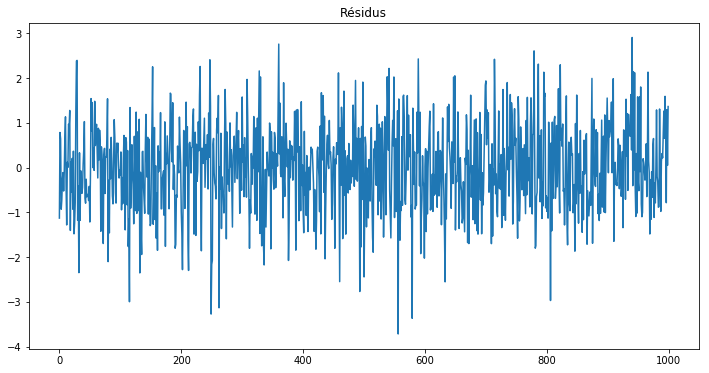

In [10]:
# maintenant avec du bruit gaussien de variance 10
N = 1000
M = 10

X, y = make_regression(n_samples=N, n_features=M, noise =1)
t = time()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Calcul fait en {:.2f}s".format( (time() -t) ))

# prediction
yhat = [0 for i in range(N)]
for k in range(M):
    yhat += X[:, k]* beta[k]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(np.abs(e))))

fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.plot(e)
plt.title('Résidus')

In [12]:
N = 100
M = 200

X, y = make_regression(n_samples=N, n_features=M)
t = time()
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Calcul fait en {:.2f}s".format( (time() -t) ))

# prediction
yhat = [0 for i in range(N)]
for k in range(M):
    yhat += X[:, k]* beta[k]

# erreur residuelle
e = y - yhat

print("l'erreur résiduelle moyenne est {:.4f} ".format(np.mean(np.abs(e))))


Calcul fait en 0.00s
l'erreur résiduelle moyenne est 2883.4586 


In [14]:
import pandas as pd
import statsmodels.formula.api as smf

df = pd.read_csv('../data/autos_mpg.csv')

df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1,18.0,8,307.0,130.0,3504,12.0,70,1
1,2,15.0,8,350.0,165.0,3693,11.5,70,1
2,3,18.0,8,318.0,150.0,3436,11.0,70,1
3,4,16.0,8,304.0,150.0,3433,12.0,70,1
4,5,17.0,8,302.0,140.0,3449,10.5,70,1


In [13]:
lm = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + origin ', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     165.5
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          4.84e-104
Time:                        11:45:29   Log-Likelihood:                -1131.1
No. Observations:                 398   AIC:                             2276.
Df Residuals:                     391   BIC:                             2304.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       42.7111      2.693     15.861      0.000      37.417      48.005
cylinders       -0.5256      0.404     -1.302      0.194      -1.320       0.268
displacement     0.0106      0.009      1.133      0.258      -0.008       0.029
horsepower      -0.0529      0.016     -3.277      0.001      -0.085      -0.021
weight          -0.0051      0.001     -6.441      0.000      -0.007      -0.004
acceleration     0.0043      0.120      0.036      0.972      -0.232       0.241
origin           1.4269      0.345      4.136      0.000       0.749       2.105
==============================================================================
Omnibus:                       32.659   Durbin-Watson:                   0.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.338
Skew:                           0.624   Prob(JB):                     3.88e-10
Kurtosis:                       4.028   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""